# Imports

In [1]:
import os

import pandas as pd
import scanpy
import seaborn as sns
from pandas_utils import describe

In [4]:
from path_constants import sig_outdir_base

## Read h5ad

In [28]:
h5ad = "/home/olga/data_lg/kmer-homology-data/h5ads/LCA_h5ad_complete.h5ad"
lemur_tenx = scanpy.read(h5ad, cache=True)

In [99]:
GDRIVE_OUTPUT = '/home/olga/googledrive/TabulaMicrocebus/analysis/kmer_analysis/'

# Read parquet files

## File paths

In [9]:
sketch_id = "alphabet-dayhoff__ksize-51__scaled-10"


hash2kmer_with_predictions = pd.read_parquet(
    os.path.join(
        sig_outdir_base,
        f"aggregated-hash2kmer-with-predicted-cells--{sketch_id}--with-orthology.parquet",
    )
)

In [10]:
describe(hash2kmer_with_predictions)

(190862509, 17)
--- First 5 entries ---


,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,groundtruth_celltype,kmer_category,predicted_celltype,groundtruth_compartment,predicted_compartment
0,CFPLRYGGKKKKNKKGK,afbedfbbddddcddbd,1049274497017264409,A00111:78:H3YHCDMXX:1:1131:31720:15123\tCB:Z:T...,None,mouse,MACA_21M_F_LUNG_55__TTAGTTCCACTTACGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Monocyte,Not in reference genome,None,None,None
1,GSSVLIAVRTPEPSPRR,bbbeeebedbbcbbbdd,869748735803144472,A00111:78:H3YHCDMXX:1:1176:19262:14810\tCB:Z:T...,None,mouse,MACA_21M_F_LUNG_55__TTAGTTCCACTTACGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Monocyte,Not in reference genome,None,None,None
2,SSVLIAVRTPEPSPRRH,bbeeebedbbcbbbddd,1784576325013871600,A00111:78:H3YHCDMXX:1:1176:19262:14810\tCB:Z:T...,None,mouse,MACA_21M_F_LUNG_55__TTAGTTCCACTTACGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Monocyte,Not in reference genome,None,None,None
3,REVQTKYILEGVIQLIQ,dcecbdfeecbeeceec,565750021167986172,A00111:78:H3YHCDMXX:1:1180:1561:11804\tCB:Z:TT...,None,mouse,MACA_21M_F_LUNG_55__TTAGTTCCACTTACGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Monocyte,Not in reference genome,None,None,None
4,YILEGVIQLIQDRIGKD,feecbeeceeccdebdc,1093885956538373214,A00111:78:H3YHCDMXX:1:1180:1561:11804\tCB:Z:TT...,None,mouse,MACA_21M_F_LUNG_55__TTAGTTCCACTTACGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Monocyte,Not in reference genome,None,None,None


In [11]:
set(hash2kmer_with_predictions.species)

{'bat', 'human', 'lemur', 'mouse'}

## Get human aligned

In [12]:
%%time

human_aligned = hash2kmer_with_predictions.query(
    'species == "human" and alignment_status == "aligned"'
)
describe(human_aligned)

(33265945, 17)
--- First 5 entries ---


,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,groundtruth_celltype,kmer_category,predicted_celltype,groundtruth_compartment,predicted_compartment
0,VRRSLGFCDTTNKGLFQ,eddbebfacbbcdbefc,1410289696546088801,A00111:155:HFCWYDMXX:2:2406:13286:32800\tCB:Z:...,C1QA,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Fibroblast,"In ref genome, in a 1:1 orthologous gene",Fibroblast,stromal,stromal
2,QQGDQVWVEKDPKKGHI,ccbccefecdcbddbde,1709380958464415884,A00111:155:HFCWYDMXX:2:1477:14190:22341\tCB:Z:...,C1QA,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Fibroblast,"In ref genome, in a 1:1 orthologous gene",Fibroblast,stromal,stromal
9,DPKKGHIYQGSEADSVF,cbddbdefcbbcbcbef,461129414014478240,A00111:155:HFCWYDMXX:1:1476:25907:35931\tCB:Z:...,C1QA,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Fibroblast,"In ref genome, in a 1:1 orthologous gene",Fibroblast,stromal,stromal
11,KGHIYQGSEADSVFSGF,dbdefcbbcbcbefbbf,1055687759452596764,A00111:155:HFCWYDMXX:2:2148:8079:19085\tCB:Z:G...,C1QA,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Fibroblast,"In ref genome, in a 1:1 orthologous gene",Fibroblast,stromal,stromal
20,SFDVVSQMMMEDILRVG,bfceebceeecceedeb,531459719368800260,A00111:155:HFCWYDMXX:2:2411:22390:36886\tCB:Z:...,EPHB2,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Fibroblast,"In ref genome, in a 1:1 orthologous gene",Fibroblast,stromal,stromal


CPU times: user 15.8 s, sys: 6.99 s, total: 22.7 s
Wall time: 22.4 s


## Get mouse aligned

In [31]:
%%time

mouse_aligned = hash2kmer_with_predictions.query(
    'species == "mouse" and alignment_status == "aligned"'
)
describe(mouse_aligned)

(82835648, 17)
--- First 5 entries ---


,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,groundtruth_celltype,kmer_category,predicted_celltype,groundtruth_compartment,predicted_compartment
0,LGRGSFMLGLETHDRKS,ebdbbfeebecbdcddb,819891562703677479,A00111:78:H3YHCDMXX:1:2269:8829:36198\tCB:Z:TT...,Cops5,mouse,MACA_21M_F_LUNG_55__TTAGTTCCACTTACGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Monocyte,"In ref genome, not in a 1:1 orthologous gene",None,None,None
1,SFMLGLETHDRKSEDKL,bfeebecbdcddbccde,1633184502585946504,A00111:78:H3YHCDMXX:1:2269:8829:36198\tCB:Z:TT...,Cops5,mouse,MACA_21M_F_LUNG_55__TTAGTTCCACTTACGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Monocyte,"In ref genome, not in a 1:1 orthologous gene",None,None,None
2,FMLGLETHDRKSEDKLA,feebecbdcddbccdeb,15431733626383755,A00111:78:H3YHCDMXX:1:2269:8829:36198\tCB:Z:TT...,Cops5,mouse,MACA_21M_F_LUNG_55__TTAGTTCCACTTACGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Monocyte,"In ref genome, not in a 1:1 orthologous gene",None,None,None
3,HDRKSEDKLAKATRDSC,dcddbccdebdbbdcba,1283705501713440569,A00111:78:H3YHCDMXX:1:2269:8829:36198\tCB:Z:TT...,Cops5,mouse,MACA_21M_F_LUNG_55__TTAGTTCCACTTACGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Monocyte,"In ref genome, not in a 1:1 orthologous gene",None,None,None
8,TDYSLIARSLGKFGIIC,bcfbeebdbebdfbeea,592998236038473320,A00111:78:H3YHCDMXX:2:1188:17915:4617\tCB:Z:TT...,Rpl7,mouse,MACA_21M_F_LUNG_55__TTAGTTCCACTTACGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Monocyte,"In ref genome, not in a 1:1 orthologous gene",None,None,None


CPU times: user 31.7 s, sys: 4.81 s, total: 36.5 s
Wall time: 36.1 s


## Get lemur UNaligned

In [13]:
lemur_unaligned = hash2kmer_with_predictions.query(
    'species == "lemur" and alignment_status == "unaligned"'
)
describe(lemur_unaligned)

(100244, 17)
--- First 5 entries ---


,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,groundtruth_celltype,kmer_category,predicted_celltype,groundtruth_compartment,predicted_compartment
0,LTDKLKTRNRESISLLM,ebcdedbdcdcbebeee,1790316921548885678,A00111:211:HGKCVDMXX:1:1117:16875:32659\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid
1,KRMSREMDSRFLVLSLS,ddebdcecbdfeeebeb,1325241730468899129,A00111:211:HGKCVDMXX:1:1117:16875:32659\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid
2,EMDSRFLVLSLSVSLLQ,cecbdfeeebebebeec,258741458531798266,A00111:211:HGKCVDMXX:1:1117:16875:32659\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid
3,IALKKQRTKKNKEEAAE,ebeddcdbddcdccbbc,1590742764537911629,A00111:211:HGKCVDMXX:1:1127:28655:1423\tCB:Z:C...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid
4,ITGVSHCARPKIKFSCL,ebbebdabdbdedfbae,674102238121922602,A00111:211:HGKCVDMXX:1:1127:31964:25097\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid


## Get lemur unaligned kmers in human aligned or mouse aligned

In [32]:
lemur_unaligned_in_human_aligned = lemur_unaligned.query(
    "kmer_in_alphabet in @human_aligned.kmer_in_alphabet "
    "or kmer_in_alphabet in @mouse_aligned.kmer_in_alphabet"
)
describe(lemur_unaligned_in_human_aligned)

(19807, 17)
--- First 5 entries ---


,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,groundtruth_celltype,kmer_category,predicted_celltype,groundtruth_compartment,predicted_compartment
5,AVRGEQWTPIEPKPRER,bedbccfbbecbdbdcd,635755373227148015,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid
6,VRGEQWTPIEPKPRERL,edbccfbbecbdbdcde,256286058604884541,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid
7,GEQWTPIEPKPRERLQV,bccfbbecbdbdcdece,625984889571517897,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid
8,PPSNPPPRPPAEARKKP,bbbcbbbdbbbcbdddb,581752409252884009,A00111:211:HGKCVDMXX:1:1139:29378:36652\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid
10,SSSRPATPRPGPQPRPA,bbbdbbbbdbbbcbdbb,39532613428864969,A00111:211:HGKCVDMXX:1:1139:29378:36652\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid


In [42]:
lemur_unaligned_in_human_aligned.to_csv(
    "/home/olga/googledrive/TabulaMicrocebus/analysis/kmer_analysis/unaligned_lemur_kmers_share_kmers_with_human.csv"
)

## Get gene names from human

In [ ]:
human_aligned_in_lemur = human_aligned.query(
    "kmer_in_alphabet in @lemur_unaligned_in_human_aligned.kmer_in_alphabet"
)
describe(human_aligned_in_lemur)

human_aligned_in_lemur__kmer_to_name = human_aligned_in_lemur[
    ["kmer_in_alphabet", "gene_name"]  # "kmer_in_sequence",
].drop_duplicates(subset=["kmer_in_alphabet", "gene_name"])
describe(human_aligned_in_lemur__kmer_to_name)

lemur_unaligned_in_human_aligned__with_gene_name = (
    lemur_unaligned_in_human_aligned.merge(
        human_aligned_in_lemur__kmer_to_name,
        how="left",
        on="kmer_in_alphabet",
        suffixes=["__lemur", "__human"],
    )
)
describe(lemur_unaligned_in_human_aligned__with_gene_name)

In [44]:
lemur_unaligned_in_human_aligned__with_gene_name.to_csv(
    "/home/olga/googledrive/TabulaMicrocebus/analysis/kmer_analysis/unaligned_lemur_kmers_share_kmers_with_human_with_human_gene_name.csv"
)

## Get gene names from mouse

In [45]:
lemur_unaligned_in_mouse_aligned = lemur_unaligned.query(
    "kmer_in_alphabet in @mouse_aligned.kmer_in_alphabet "
    "or kmer_in_alphabet in @mouse_aligned.kmer_in_alphabet"
)
describe(lemur_unaligned_in_mouse_aligned)

mouse_aligned_in_lemur = mouse_aligned.query(
    "kmer_in_alphabet in @lemur_unaligned_in_mouse_aligned.kmer_in_alphabet"
)
describe(mouse_aligned_in_lemur)

mouse_aligned_in_lemur__kmer_to_name = mouse_aligned_in_lemur[
    ["kmer_in_alphabet", "gene_name"]  # "kmer_in_sequence",
].drop_duplicates(subset=["kmer_in_alphabet", "gene_name"])
describe(mouse_aligned_in_lemur__kmer_to_name)


lemur_unaligned_in_mouse_aligned__with_gene_name = (
    lemur_unaligned_in_mouse_aligned.merge(
        mouse_aligned_in_lemur__kmer_to_name,
        how="left",
        on="kmer_in_alphabet",
        suffixes=["__lemur", "__mouse"],
    )
)
describe(lemur_unaligned_in_mouse_aligned__with_gene_name)

(19127, 17)
--- First 5 entries ---


,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,groundtruth_celltype,kmer_category,predicted_celltype,groundtruth_compartment,predicted_compartment
5,AVRGEQWTPIEPKPRER,bedbccfbbecbdbdcd,635755373227148015,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid
6,VRGEQWTPIEPKPRERL,edbccfbbecbdbdcde,256286058604884541,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid
7,GEQWTPIEPKPRERLQV,bccfbbecbdbdcdece,625984889571517897,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid
8,PPSNPPPRPPAEARKKP,bbbcbbbdbbbcbdddb,581752409252884009,A00111:211:HGKCVDMXX:1:1139:29378:36652\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid
10,SSSRPATPRPGPQPRPA,bbbdbbbbdbbbcbdbb,39532613428864969,A00111:211:HGKCVDMXX:1:1139:29378:36652\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid


(1645398, 17)
--- First 5 entries ---


,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,groundtruth_celltype,kmer_category,predicted_celltype,groundtruth_compartment,predicted_compartment
75,PSLALLSPSSSATSLSL,bbebeebbbbbbbbebe,1098607277922682532,A00111:78:H3YHCDMXX:1:2333:20229:32518\tCB:Z:T...,Eif5b,mouse,MACA_21M_F_LUNG_55__TTAGTTCCACTTACGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Monocyte,"In ref genome, in a 1:1 orthologous gene",None,None,None
128,MQIKATLRFHLTPVRMA,ecedbbedfdebbedeb,255628689593233250,A00111:78:H3YHCDMXX:2:1360:19614:6652\tCB:Z:TT...,None,mouse,MACA_21M_F_LUNG_55__TTAGTTCCACTTACGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Monocyte,"In ref genome, not in a gene",None,None,None
152,PRTWPTRPPPSSSSGSS,bdbfbbdbbbbbbbbbb,448075566603896129,A00111:78:H3YHCDMXX:2:2307:7581:6417\tCB:Z:TTA...,Gm11605,mouse,MACA_21M_F_LUNG_55__TTAGTTCCACTTACGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Monocyte,"In ref genome, not in a 1:1 orthologous gene",None,None,None
400,PSFLPSFLPSFLPFFLF,bbfebbfebbfebffef,1248712149829249585,A00111:78:H3YHCDMXX:1:1372:32172:27085\tCB:Z:T...,None,mouse,MACA_21M_F_LUNG_55__TTAGTTCCACTTACGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Monocyte,"In ref genome, not in a gene",None,None,None
721,TKKNKEEAAEYAKLLAN,bddcdccbbcfbdeebc,782113034567730579,A00111:78:H3YHCDMXX:2:2288:13819:5729\tCB:Z:TT...,Rps6-ps4,mouse,MACA_21M_F_LUNG_55__TTAGTTCCACTTACGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Monocyte,"In ref genome, not in a 1:1 orthologous gene",None,None,None


(30093, 2)
--- First 5 entries ---


,kmer_in_alphabet,gene_name
75,bbebeebbbbbbbbebe,Eif5b
128,ecedbbedfdebbedeb,None
152,bdbfbbdbbbbbbbbbb,Gm11605
400,bbfebbfebbfebffef,None
721,bddcdccbbcfbdeebc,Rps6-ps4


(143705, 19)
--- First 5 entries ---


,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name__lemur,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,groundtruth_celltype,kmer_category,predicted_celltype,groundtruth_compartment,predicted_compartment,gene_name__human,gene_name
0,AVRGEQWTPIEPKPRER,bedbccfbbecbdbdcd,635755373227148015,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,None,Cyba
1,AVRGEQWTPIEPKPRER,bedbccfbbecbdbdcd,635755373227148015,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,None,None
2,AVRGEQWTPIEPKPRER,bedbccfbbecbdbdcd,635755373227148015,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,CYBA,Cyba
3,AVRGEQWTPIEPKPRER,bedbccfbbecbdbdcd,635755373227148015,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,CYBA,None
4,VRGEQWTPIEPKPRERL,edbccfbbecbdbdcde,256286058604884541,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,CYBA,Cyba


In [47]:
describe(lemur_unaligned_in_mouse_aligned__with_gene_name)

(80382, 18)
--- First 5 entries ---


,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name__lemur,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,groundtruth_celltype,kmer_category,predicted_celltype,groundtruth_compartment,predicted_compartment,gene_name__mouse
0,AVRGEQWTPIEPKPRER,bedbccfbbecbdbdcd,635755373227148015,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,Cyba
1,AVRGEQWTPIEPKPRER,bedbccfbbecbdbdcd,635755373227148015,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,None
2,VRGEQWTPIEPKPRERL,edbccfbbecbdbdcde,256286058604884541,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,Cyba
3,GEQWTPIEPKPRERLQV,bccfbbecbdbdcdece,625984889571517897,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,Cyba
4,PPSNPPPRPPAEARKKP,bbbcbbbdbbbcbdddb,581752409252884009,A00111:211:HGKCVDMXX:1:1139:29378:36652\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,Cyba


### WRite to file!!!

In [46]:
lemur_unaligned_in_human_aligned__with_gene_name.to_csv(
    "/home/olga/googledrive/TabulaMicrocebus/analysis/kmer_analysis/unaligned_lemur_kmers_share_kmers_with_mouse_with_mouse_gene_name.csv"
)

# Concatenate human and mouse data

In [57]:
lemur_unaligned_in_mouse_aligned__with_gene_name["gene_species"] = "mouse"
lemur_unaligned_in_mouse_aligned__with_gene_name.rename(
    columns={"gene_name__mouse": "gene_name__otherspecies"}
)
lemur_unaligned_in_mouse_aligned__with_gene_name.head()

,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name__lemur,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,groundtruth_celltype,kmer_category,predicted_celltype,groundtruth_compartment,predicted_compartment,gene_name__mouse,gene_species
0,AVRGEQWTPIEPKPRER,bedbccfbbecbdbdcd,635755373227148015,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,Cyba,mouse
1,AVRGEQWTPIEPKPRER,bedbccfbbecbdbdcd,635755373227148015,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,None,mouse
2,VRGEQWTPIEPKPRERL,edbccfbbecbdbdcde,256286058604884541,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,Cyba,mouse
3,GEQWTPIEPKPRERLQV,bccfbbecbdbdcdece,625984889571517897,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,Cyba,mouse
4,PPSNPPPRPPAEARKKP,bbbcbbbdbbbcbdddb,581752409252884009,A00111:211:HGKCVDMXX:1:1139:29378:36652\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,Cyba,mouse


In [58]:
lemur_unaligned_in_human_aligned__with_gene_name["gene_species"] = "human"
lemur_unaligned_in_human_aligned__with_gene_name.rename(
    columns={"gene_name__human": "gene_name__otherspecies"}
)
lemur_unaligned_in_human_aligned__with_gene_name.head()

,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name__lemur,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,groundtruth_celltype,kmer_category,predicted_celltype,groundtruth_compartment,predicted_compartment,gene_name__human,gene_species
0,AVRGEQWTPIEPKPRER,bedbccfbbecbdbdcd,635755373227148015,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,None,human
1,AVRGEQWTPIEPKPRER,bedbccfbbecbdbdcd,635755373227148015,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,CYBA,human
2,VRGEQWTPIEPKPRERL,edbccfbbecbdbdcde,256286058604884541,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,CYBA,human
3,GEQWTPIEPKPRERLQV,bccfbbecbdbdcdece,625984889571517897,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,NaN,human
4,PPSNPPPRPPAEARKKP,bbbcbbbdbbbcbdddb,581752409252884009,A00111:211:HGKCVDMXX:1:1139:29378:36652\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,CYBA,human


In [74]:
lemur_unaligned_in_human_aligned__with_gene_name_drop_duplicates = (
    lemur_unaligned_in_human_aligned__with_gene_name.drop_duplicates(
        ["groundtruth_celltype", "kmer_in_alphabet", "gene_name__human"]
    )
)
describe(lemur_unaligned_in_human_aligned__with_gene_name_drop_duplicates)

(18912, 19)
--- First 5 entries ---


,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name__lemur,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,groundtruth_celltype,kmer_category,predicted_celltype,groundtruth_compartment,predicted_compartment,gene_name__human,gene_species
0,AVRGEQWTPIEPKPRER,bedbccfbbecbdbdcd,635755373227148015,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,None,human
1,AVRGEQWTPIEPKPRER,bedbccfbbecbdbdcd,635755373227148015,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,CYBA,human
2,VRGEQWTPIEPKPRERL,edbccfbbecbdbdcde,256286058604884541,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,CYBA,human
3,GEQWTPIEPKPRERLQV,bccfbbecbdbdcdece,625984889571517897,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,NaN,human
4,PPSNPPPRPPAEARKKP,bbbcbbbdbbbcbdddb,581752409252884009,A00111:211:HGKCVDMXX:1:1139:29378:36652\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,CYBA,human


In [76]:
lemur_unaligned_in_human_aligned__with_gene_name_drop_duplicates.gene_name__human.value_counts().head(20)

RPN1        66
CYBA        54
RPS6        48
RPS4X       41
UBE4B       41
APBA3       40
COPG1       39
KDM5C       32
KIAA0586    31
UPF3A       30
EIF2S3      29
TUBGCP2     27
SRI         25
KPNA2       24
SMPD4       23
SEC31A      23
TXLNG       21
SSBP4       21
C17orf85    21
SUGP1       19
Name: gene_name__human, dtype: int64

In [80]:
lemur_unaligned_in_mouse_aligned__with_gene_name.gene_name__mouse.value_counts().head(20)

Rplp1         906
Rps6          882
Rps6-ps4      816
Tgfb1         685
Rps4x         640
Cd74          596
Rplp0         583
Gm8730        497
Rps6-ps3      495
Rplp2         488
Cyba          466
Cited2        461
Gm9616        420
Gm8925        402
Gm11263       399
Mycbp2        370
Gm3362        366
Rpl23a        349
Wdr89         342
Rpl23a-ps3    340
Name: gene_name__mouse, dtype: int64

In [59]:
lemur_unaligned_in_human_mouse_gene_name = pd.concat([lemur_unaligned_in_human_aligned__with_gene_name, lemur_unaligned_in_mouse_aligned__with_gene_name])

# Count number of genes per celltype "discovered"


In [69]:
n_genes_per_lemur_celltype_annotated_by_mouse = (
    lemur_unaligned_in_mouse_aligned__with_gene_name.groupby(
        "groundtruth_celltype"
    ).gene_name__mouse.nunique()
)
n_genes_per_lemur_celltype_annotated_by_mouse

groundtruth_celltype
Alveolar Epithelial Type 2         1202
B cell                             1021
Capillary                          2189
Dendritic                          2818
Fibroblast                         3620
Macrophage                         1224
Monocyte                            558
Natural Killer T cell              1882
Smooth Muscle and Myofibroblast       0
T cell                             2091
Name: gene_name__mouse, dtype: int64

In [77]:
n_genes_per_lemur_celltype_annotated_by_mouse.to_csv(
    "/home/olga/googledrive/TabulaMicrocebus/analysis/kmer_analysis/n_genes_per_lemur_celltype_annotated_by_mouse.csv"
)

In [66]:
lemur_unaligned_in_mouse_aligned__with_gene_name.gene_name__mouse.nunique()

5142

In [68]:
lemur_unaligned_in_human_aligned__with_gene_name.gene_name__human.nunique()

1117

In [70]:
n_genes_per_lemur_celltype_annotated_by_human = (
    lemur_unaligned_in_human_aligned__with_gene_name.groupby(
        "groundtruth_celltype"
    ).gene_name__human.nunique()
)
n_genes_per_lemur_celltype_annotated_by_human

groundtruth_celltype
Alveolar Epithelial Type 2         116
B cell                             117
Capillary                          343
Dendritic                          375
Fibroblast                         660
Macrophage                         178
Monocyte                            58
Natural Killer T cell              307
Smooth Muscle and Myofibroblast      0
T cell                             278
Name: gene_name__human, dtype: int64

In [72]:
n_genes_per_lemur_celltype_annotated_by_human.to_csv(
    "/home/olga/googledrive/TabulaMicrocebus/analysis/kmer_analysis/n_genes_per_lemur_celltype_annotated_by_human.csv"
)

## Divide by total number of lemur cells per celltype

In [82]:
%%time

n_lemur_cells_per_celltype = (
    hash2kmer_with_predictions.query('species == "lemur"')
    .groupby(["groundtruth_celltype"]).cell_id.nunique()
)
n_lemur_cells_per_celltype

CPU times: user 3.34 s, sys: 682 ms, total: 4.03 s
Wall time: 3.75 s


groundtruth_celltype
Alveolar Epithelial Type 2          21
B cell                              35
Capillary                          120
Dendritic                           90
Fibroblast                         340
Macrophage                          19
Monocyte                            12
Natural Killer T cell               78
Smooth Muscle and Myofibroblast      0
T cell                              89
Name: cell_id, dtype: int64

In [92]:
percent_human_annotated = (
    n_genes_per_lemur_celltype_annotated_by_human / n_lemur_cells_per_celltype
)
percent_human_annotated.name = "genes_per_cell"
percent_human_annotated = percent_human_annotated.reset_index().dropna()
percent_human_annotated["species"] = "human"
# percent_human_annotated = percent_human_annotated.rename(co)
percent_human_annotated

,groundtruth_celltype,genes_per_cell,species
0,Alveolar Epithelial Type 2,5.523810,human
1,B cell,3.342857,human
2,Capillary,2.858333,human
3,Dendritic,4.166667,human
4,Fibroblast,1.941176,human
5,Macrophage,9.368421,human
6,Monocyte,4.833333,human
7,Natural Killer T cell,3.935897,human
9,T cell,3.123596,human


In [90]:
percent_mouse_annotated = (
    n_genes_per_lemur_celltype_annotated_by_mouse / n_lemur_cells_per_celltype
)
percent_mouse_annotated.name = "genes_per_cell"
percent_mouse_annotated = percent_mouse_annotated.reset_index().dropna()
percent_mouse_annotated["species"] = "mouse"
# percent_human_annotated = percent_human_annotated.rename(co)
percent_mouse_annotated

,groundtruth_celltype,genes_per_cell,species
0,Alveolar Epithelial Type 2,57.238095,mouse
1,B cell,29.171429,mouse
2,Capillary,18.241667,mouse
3,Dendritic,31.311111,mouse
4,Fibroblast,10.647059,mouse
5,Macrophage,64.421053,mouse
6,Monocyte,46.500000,mouse
7,Natural Killer T cell,24.128205,mouse
9,T cell,23.494382,mouse


In [96]:
percent_annotated_per_species = pd.concat(
    [percent_mouse_annotated, percent_human_annotated]
)
percent_annotated_per_species.groundtruth_celltype = percent_annotated_per_species.groundtruth_celltype.cat.remove_unused_categories()
percent_annotated_per_species

,groundtruth_celltype,genes_per_cell,species
0,Alveolar Epithelial Type 2,57.238095,mouse
1,B cell,29.171429,mouse
2,Capillary,18.241667,mouse
3,Dendritic,31.311111,mouse
4,Fibroblast,10.647059,mouse
5,Macrophage,64.421053,mouse
6,Monocyte,46.500000,mouse
7,Natural Killer T cell,24.128205,mouse
9,T cell,23.494382,mouse
0,Alveolar Epithelial Type 2,5.523810,human


/home/olga/miniconda3/envs/immune-evolution/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


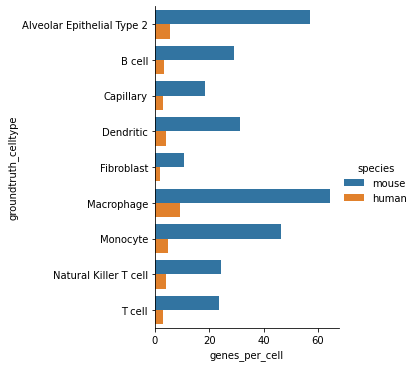

In [101]:
g = sns.factorplot(
    hue="species",
    y="groundtruth_celltype",
    x="genes_per_cell",
    data=percent_annotated_per_species,
    kind="bar",
)
g.savefig(os.path.join(GDRIVE_OUTPUT, 'unaligned_lemur_kmers_annotated_with_human_mouse.pdf'))

In [36]:
unannotated_lemur_genes_of_interest = set(
    """AICDA
BST2
CCR2
CD1A
CD1C
CD24
DEFA5
FCGR1A
FCGR3A
HSD3B1
ITGAX
LHB
LILRA4
MAGEA4
MYH6
MYH7
OPN1MW
PPBP
SCT
SPN
TEX12
TLR9""".split()
)
unannotated_lemur_genes_of_interest

{'AICDA',
 'BST2',
 'CCR2',
 'CD1A',
 'CD1C',
 'CD24',
 'DEFA5',
 'FCGR1A',
 'FCGR3A',
 'HSD3B1',
 'ITGAX',
 'LHB',
 'LILRA4',
 'MAGEA4',
 'MYH6',
 'MYH7',
 'OPN1MW',
 'PPBP',
 'SCT',
 'SPN',
 'TEX12',
 'TLR9'}

In [38]:
lemur_unaligned_in_human_aligned__with_gene_name.query(
    "gene_name__human in @unannotated_lemur_genes_of_interest"
).to_csv(
    "/home/olga/googledrive/TabulaMicrocebus/analysis/kmer_analysis/unaligned_lemur_kmers_in_genes_of_interest.csv"
)

In [20]:
gene_kmer_counts = lemur_unaligned_in_human_aligned__with_gene_name.groupby(
    ["gene_name__human", "groundtruth_celltype"]
).cell_id.nunique()
gene_kmer_counts.head(20)

gene_name__human  groundtruth_celltype           
ABHD11            Alveolar Epithelial Type 2         0
                  B cell                             0
                  Capillary                          0
                  Dendritic                          0
                  Fibroblast                         0
                  Macrophage                         0
                  Monocyte                           0
                  Natural Killer T cell              0
                  Smooth Muscle and Myofibroblast    0
                  T cell                             1
ABI3              Alveolar Epithelial Type 2         0
                  B cell                             0
                  Capillary                          0
                  Dendritic                          1
                  Fibroblast                         1
                  Macrophage                         1
                  Monocyte                           0
               

In [21]:
lemur_unaligned_in_human_aligned__with_gene_name.shape

(7521, 18)

In [22]:
lemur_tenx.var.index.isin(gene_kmer_counts.index.levels[0]).sum()

NameError: name 'lemur_tenx' is not defined

In [ ]:
gene_names_not_in_h5ad = gene_kmer_counts.index.levels[0].difference(
    lemur_tenx.var.index
)
gene_names_not_in_h5ad

In [ ]:
gene_kmer_counts_not_in_h5ad = gene_kmer_counts.loc[gene_names_not_in_h5ad].sort_values(
    ascending=False
)
gene_kmer_counts_not_in_h5ad.head(20).sort_index()

In [ ]:
lemur_unaligned_in_human_aligned__with_gene_name__not_in_h5ad = (
    lemur_unaligned_in_human_aligned__with_gene_name.query(
        "gene_name__human in @gene_kmer_counts_not_in_h5ad.index.levels[0]"
    )
)
describe(lemur_unaligned_in_human_aligned__with_gene_name__not_in_h5ad)

## Compute nubmer of new genes per celltype

## Compute number of cells expressing hte new gene, epr celltype

In [ ]:
n_cells_per_gene = (
    lemur_unaligned_in_human_aligned__with_gene_name__not_in_h5ad.groupby(
        ["groundtruth_celltype", "gene_name__human"], observed=True
    ).cell_id.nunique()
)
n_cells_per_gene.name = "n_cells_per_gene"
n_cells_per_gene = n_cells_per_gene.reset_index()
print(n_cells_per_gene.shape)
n_cells_per_gene.head()

In [ ]:
n_cells_per_gene.query('gene_name__human == "SPN"')

In [ ]:
n_cells_per_gene.groundtruth_celltype = (
    n_cells_per_gene.groundtruth_celltype.cat.remove_unused_categories()
)
n_cells_per_gene.groundtruth_celltype.cat.categories

In [ ]:
# def annotate_top_n(x, y, z, n, *args, **kwargs):


g = sns.catplot(y="groundtruth_celltype", x="n_cells_per_gene", data=n_cells_per_gene)

# g.map(annotate_top_n, y='groundtruth_celltype', x='n_cells_per_gene', z='gene_name__human', n=5)

/home/olga/miniconda3/envs/immune-evolution/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 84.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/olga/miniconda3/envs/immune-evolution/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 82.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/olga/miniconda3/envs/immune-evolution/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 90.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/olga/miniconda3/envs/immune-evolution/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 90.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

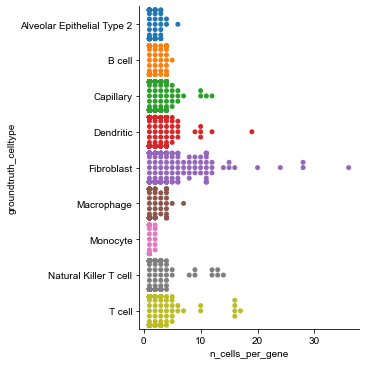

In [155]:
# def annotate_top_n(x, y, z, n, *args, **kwargs):


g = sns.catplot(y="groundtruth_celltype", x="n_cells_per_gene", data=n_cells_per_gene, kind='swarm')

# g.map(annotate_top_n, y='groundtruth_celltype', x='n_cells_per_gene', z='gene_name__human', n=5)

In [146]:
# g.ax.collections[0].get_datalim

In [125]:
n_cells_per_gene["percent_cells_per_gene"] = (
    100
    * n_cells_per_gene.n_cells_per_gene
    / n_cells_per_gene.groundtruth_celltype.astype(str).map(lemur_celltype_counts)
)
n_cells_per_gene.head()

,groundtruth_celltype,gene_name__human,n_cells_per_gene,percent_cells_per_gene
0,Dendritic,ABI3,1,0.361011
1,Dendritic,ABL1,10,3.610108
2,Dendritic,ACIN1,1,0.361011
3,Dendritic,ADGRL1,1,0.361011
4,Dendritic,AGAP2,1,0.361011


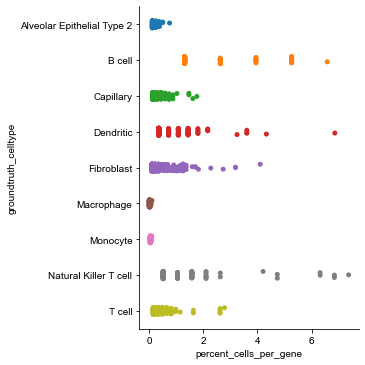

In [139]:
sns.catplot(y="groundtruth_celltype", x="percent_cells_per_gene", data=n_cells_per_gene)

In [137]:
n_cells_per_gene.query('gene_name__human == "SPN"')

,groundtruth_celltype,gene_name__human,n_cells_per_gene,percent_cells_per_gene
299,Dendritic,SPN,4,1.444043
889,Fibroblast,SPN,11,1.254276
1270,Natural Killer T cell,SPN,3,1.578947
1556,T cell,SPN,3,0.491803
1887,Capillary,SPN,4,0.589102
2219,Macrophage,SPN,4,0.061520
2414,B cell,SPN,4,5.263158


In [126]:
n_cells_per_gene__min_per_cell = n_cells_per_gene.query("n_cells_per_gene >= 3")
n_cells_per_gene__min_per_cell

,groundtruth_celltype,gene_name__human,n_cells_per_gene,percent_cells_per_gene
1,Dendritic,ABL1,10,3.610108
5,Dendritic,AHCTF1P1,3,1.083032
15,Dendritic,ATF7IP,4,1.444043
26,Dendritic,BHMT2,4,1.444043
34,Dendritic,CBFA2T3,3,1.083032
...,...,...,...,...
2406,B cell,RPS6,5,6.578947
2412,B cell,SMPD4,3,3.947368
2414,B cell,SPN,4,5.263158
2415,B cell,SRD5A3,4,5.263158


In [136]:
n_cells_per_gene__min_per_cell.groupby("groundtruth_celltype").apply(
    lambda x: x.nlargest(5, "percent_cells_per_gene")
)

groundtruth_celltype gene_name__human  \
groundtruth_celltype                                                           
Alveolar Epithelial Type 2 2043  Alveolar Epithelial Type 2            RPS4X   
                           2040  Alveolar Epithelial Type 2             RPN1   
                           2051  Alveolar Epithelial Type 2            SMPD4   
                           1963  Alveolar Epithelial Type 2             ABL1   
                           1965  Alveolar Epithelial Type 2            AP5B1   
B cell                     2406                      B cell             RPS6   
                           2318                      B cell           ATF7IP   
                           2321                      B cell            BHMT2   
                           2331                      B cell            CGNL1   
                           2338                      B cell           CSF2RA   
Capillary                  1941                   Capillary              WAS   
                           1666                   Capillary          COL14A1   
                           1620                   Capillary             ABL1   
                           1881                   Capillary            SMPD4   
                           1889                   Capillary           SRD5A3   
Dendritic                  67                     Dendritic             CYBA   
                           268                    Dendritic             RPS6   
                           1                      Dendritic             ABL1   
                           49                     Dendritic          COL14A1   
                           358                    Dendritic              WAS   
Fibroblast                 996                   Fibroblast              WAS   
                           376                   Fibroblast             ABL1   
                           473                   Fibroblast          COL14A1   
                           878                   Fibroblast            SMPD4   
                           461                   Fibroblast          CHCHD10   
Macrophage                 2110                  Macrophage             CYBA   
                           2215                  Macrophage            SMPD4   
                           2084                  Macrophage           ATF7IP   
                           2089                  Macrophage            BHMT2   
                           2102                  Macrophage            CGNL1   
Natural Killer T cell      1111       Natural Killer T cell              ELN   
                           1166       Natural Killer T cell          LURAP1L   
                           1263       Natural Killer T cell            SMPD4   
                           1199       Natural Killer T cell            PACS1   
                           1210       Natural Killer T cell          PPAPDC2   
T cell                     1493                      T cell            PACS1   
                           1412                      T cell              ELN   
                           1465                      T cell          LURAP1L   
                           1503                      T cell          PPAPDC2   
                           1551                      T cell            SMPD4   

                                 n_cells_per_gene  percent_cells_per_gene  
groundtruth_celltype                                                       
Alveolar Epithelial Type 2 2043                 6                0.760456  
                           2040                 4                0.506971  
                           2051                 4                0.506971  
                           1963                 3                0.380228  
                           1965                 3                0.380228  
B cell                     2406                 5                6.578947  
                           2318                 4                5.263

In [127]:
ls -lha /home/olga/data_lg/data_sm_copy/immune-evolution/data-objects/human-lemur-mouse-bat/

total 3.8G
drwxr-xr-x 2 olga czb 4.0K Nov  5  2020 ./
drwxrwxr-x 6 olga czb 4.0K Mar 31 09:03 ../
-rw-r--r-- 1 olga czb 974M Jun 22 17:48 basename
-rw-r--r-- 1 olga czb 974M Jun 22 17:50 human-lemur-mouse-bat__lung_only.h5ad
-rw-r--r-- 1 olga czb 883M Jun 22 17:51 human-lemur-mouse-bat__lung_only__preprocessed_bbknn.h5ad
-rw-r--r-- 1 olga czb 972M Jun 22 17:53 human-lemur-mouse-bat__lung_only__with_qc_metrics.h5ad


In [128]:
h5ad = os.path.join(
    "/home/olga/data_lg/data_sm_copy/immune-evolution/data-objects/human-lemur-mouse-bat/",
    "human-lemur-mouse-bat__lung_only__preprocessed_bbknn.h5ad",
)
adata_xspecies = scanpy.read(h5ad, cache=True)
adata_xspecies

AnnData object with n_obs × n_vars = 91042 × 10490
    obs: 'age', 'cell_barcode', 'cell_ontology_class', 'cell_ontology_id', 'channel', 'free_annotation', 'individual', 'sample', 'sequencing_run', 'sex', 'species', 'species_batch', 'species_latin', 'tissue', 'narrow_group', 'broad_group', 'compartment_group', 'compartment_narrow', 'channel_cleaned', 'cell_id', 'batch', 'n_genes', 'n_counts', 'species_batch_v2', 'compartment_broad', 'compartment_broad_narrow', 'compartment_species', 'compartment_narrow_species', 'common_individual_id', 'log_counts', 'sqrt_counts'
    var: 'bat__gene_name', 'mouse_lemur__gene_name-bat', 'mouse__gene_name-bat', 'mouse_lemur__gene_name_x-hlm', 'mouse__gene_name_x-hlm', 'gene_ids-lemur-hlm', 'n_cells-mouse-hlm', 'mouse_lemur__gene_name_y-hlm', 'mouse__gene_name_y-hlm', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'age_colors', 'broad_group_colors', 'compartment_group_colors', 'hvg', 'narrow_group_colors', 'neighbors', '

In [129]:
lemur_unaligned_in_human_aligned__with_gene_name__not_in_h5ad

,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name__lemur,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,groundtruth_celltype,kmer_category,predicted_celltype,groundtruth_compartment,predicted_compartment,gene_name__human
1,AVRGEQWTPIEPKPRER,bedbccfbbecbdbdcd,635755373227148015,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,CYBA
2,VRGEQWTPIEPKPRERL,edbccfbbecbdbdcde,256286058604884541,A00111:211:HGKCVDMXX:1:1138:19497:18286\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,CYBA
3,PPSNPPPRPPAEARKKP,bbbcbbbdbbbcbdddb,581752409252884009,A00111:211:HGKCVDMXX:1:1139:29378:36652\tCB:Z:...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,CYBA
5,AHPPPHPRPHPHPHPTP,bdbbbdbdbdbdbdbbb,1444749678442808412,A00111:211:HGKCVDMXX:1:2282:19922:6715\tCB:Z:C...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,NKTR
6,PRPPRPAPAGPRPRGGG,bdbbdbbbbbbdbdbbb,829913183598227870,A00111:211:HGKCVDMXX:1:2350:6352:33974\tCB:Z:C...,None,lemur,ANTOINE_LUNG_P3__CCCTCCTTCCTAGGGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Dendritic,Not in reference genome,Monocyte,myeloid,myeloid,HNRNPR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7514,PPTTPPPTTPVKKKKKK,bbbbbbbbbbedddddd,280704625720957758,A00111:211:HGKCVDMXX:2:2342:25771:3286\tCB:Z:G...,None,lemur,ANTOINE_LUNG_P3__GAAACTCCAGATGGCA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast,Not in reference genome,Fibroblast,stromal,stromal,POU3F1
7517,RSPTPPAPPGPPPRGAA,dbbbbbbbbbbbbdbbb,295564114433559458,A00111:211:HGKCVDMXX:1:2252:5511:5400\tCB:Z:AA...,None,lemur,ANTOINE_LUNG_P3__AAACGGGGTAAGTGTA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast,Not in reference genome,Fibroblast,stromal,stromal,WAS
7518,RSPTPPAPPGPPPRGAA,dbbbbbbbbbbbbdbbb,295564114433559458,A00111:211:HGKCVDMXX:1:2252:5511:5400\tCB:Z:AA...,None,lemur,ANTOINE_LUNG_P3__AAACGGGGTAAGTGTA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast,Not in reference genome,Fibroblast,stromal,stromal,ABL1
7519,RSPTPPAPPGPPPRGAA,dbbbbbbbbbbbbdbbb,295564114433559458,A00111:211:HGKCVDMXX:1:2252:5511:5400\tCB:Z:AA...,None,lemur,ANTOINE_LUNG_P3__AAACGGGGTAAGTGTA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast,Not in reference genome,Fibroblast,stromal,stromal,COL14A1


In [130]:
lemur_celltype_counts = adata_xspecies.obs.query(
    'species == "Mouse lemur"'
).broad_group.value_counts()
lemur_celltype_counts.head()

Macrophage            6502
Neutrophil            2528
Natural Killer        2191
Monocyte              2093
Unknown Epithelial    1660
Name: broad_group, dtype: int64

In [131]:
n_cells_per_gene__min_per_cell["percent_cells_per_gene"] = (
    100
    * n_cells_per_gene__min_per_cell.n_cells_per_gene
    / n_cells_per_gene__min_per_cell.groundtruth_celltype.astype(str).map(
        lemur_celltype_counts
    )
)
n_cells_per_gene__min_per_cell.head()

/home/olga/miniconda3/envs/immune-evolution/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,groundtruth_celltype,gene_name__human,n_cells_per_gene,percent_cells_per_gene
1,Dendritic,ABL1,10,3.610108
5,Dendritic,AHCTF1P1,3,1.083032
15,Dendritic,ATF7IP,4,1.444043
26,Dendritic,BHMT2,4,1.444043
34,Dendritic,CBFA2T3,3,1.083032


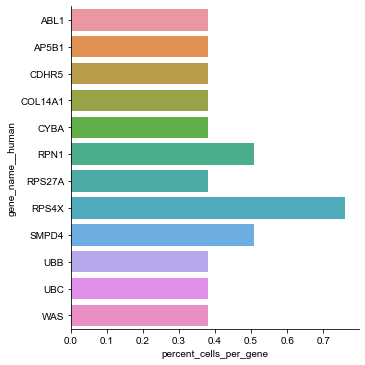

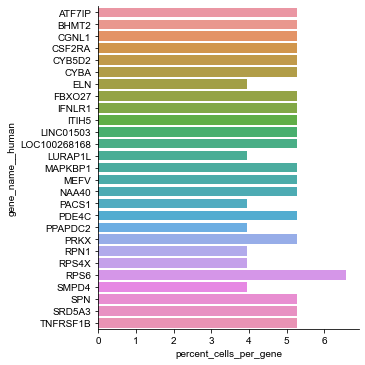

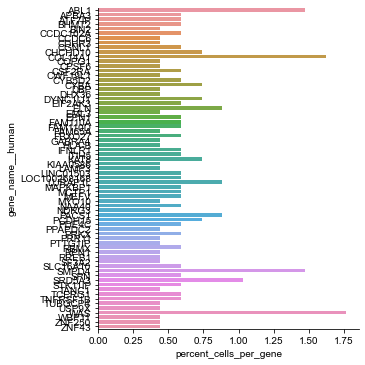

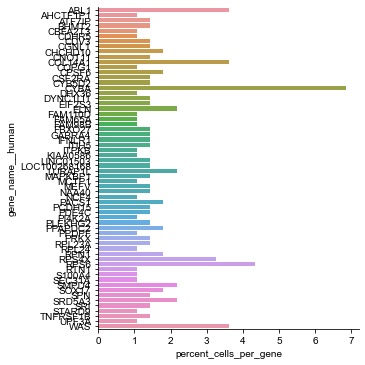

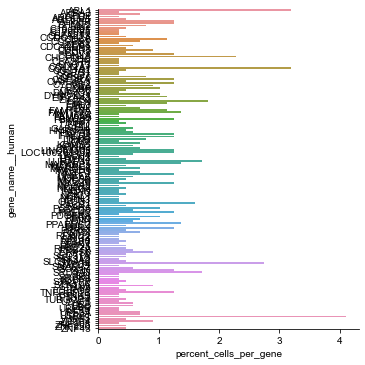

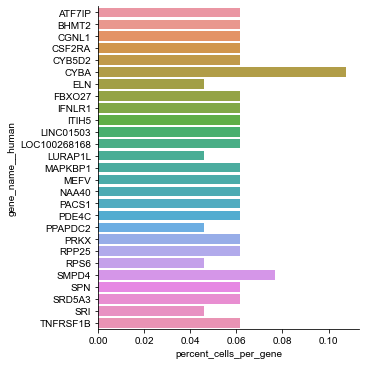

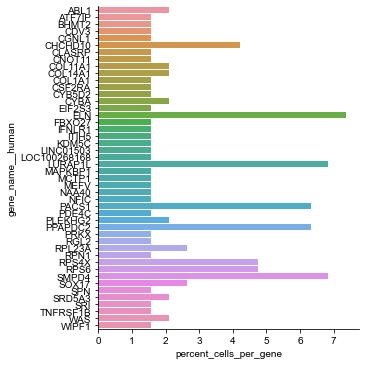

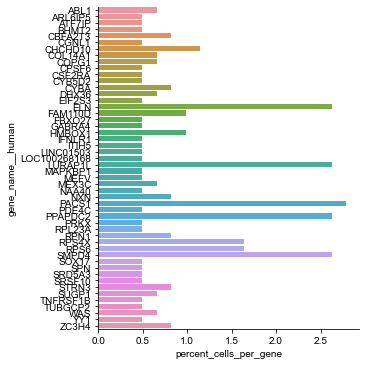

In [132]:
for celltype, df in n_cells_per_gene__min_per_cell.groupby(["groundtruth_celltype"]):
    if df.empty:
        continue

    sns.catplot(y="gene_name__human", x="percent_cells_per_gene", data=df, kind="bar")

In [81]:
n_genes_per_cell = (
    lemur_unaligned_in_human_aligned__with_gene_name__not_in_h5ad.groupby(
        ["groundtruth_celltype", "cell_id"], observed=True
    )
    .gene_name__human.nunique()
    .reset_index()
)
n_genes_per_cell = n_genes_per_cell.rename(columns={"gene_name__human": "n_genes"})
n_genes_per_cell.head()

,groundtruth_celltype,cell_id,n_genes
0,Dendritic,ANTOINE_LUNG_P3__AAAGCAATCGTTTAGG,4
1,Dendritic,ANTOINE_LUNG_P3__AACCGCGGTACTTCTT,4
2,Dendritic,ANTOINE_LUNG_P3__AATCGGTGTCGGCACT,4
3,Dendritic,ANTOINE_LUNG_P3__ACACTGAGTCCGAACC,2
4,Dendritic,ANTOINE_LUNG_P3__ACACTGAGTGTTTGGT,7


<AxesSubplot:xlabel='gene_name__human', ylabel='groundtruth_celltype'>

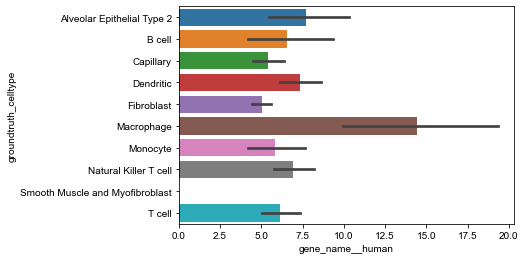

In [76]:
sns.barplot(data=n_genes_per_cell, y="groundtruth_celltype", x="gene_name__human")

In [147]:
g = sns.catplot(data=n_genes_per_cell, y="groundtruth_celltype", x="gene_name__human")

ValueError: Could not interpret input 'gene_name__human'